### Hemlata Channe
#### NLP Project I Part I
#### DOMAIN: Digital content management
    • CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles,etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classi ier that predicts multiple features of the author of a given text. We have designed it as a Multi label classi ication problem.
    • DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate ile, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
    • 8240 "10s" blogs (ages 13-17),
    • 8086 "20s" blogs(ages 23-27) and
    • 2994 "30s" blogs (ages 33-47)
    For each age group, there is an equal number of male and female bloggers.
    Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link. Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus
    • PROJECT OBJECTIVE: The need is to build a NLP classi ier which can use input text parameters to determine the label/s of the blog.
    Steps and tasks:
    1. Import and analyse the data set.
    2. Perform data pre-processing on the data:
    • Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.
    • Target/label merger and transformation
    • Train and test split
    • Vectorisation, etc.
    3. Design, train, tune and test the best text classi ier.
    4. Display and explain detail the classi ication report
    5.Print the true vs predicted labels for any 5 entries from the dataset.
    Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers. Be analytical and experimental here in trying new approaches to design the best model

In [276]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score
from sklearn.metrics import average_precision_score,recall_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

## Task 1: Import and analyse the data set. Loaded only 30000 rows from the entire dataset.

In [277]:
Data = pd.read_csv("blogtext.csv",nrows = 10000)
Data.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [278]:
Data.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

In [279]:
Data.dtypes

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

In [280]:
Data.head(2)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...


In [281]:
Data.shape

(10000, 7)

In [282]:
Data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,10000.0,1.854823e+06,1.303245e+06,467705.0,649790.0,1103575.0,3176655.0,4321554.0
age,10000.0,2.801930e+01,8.123923e+00,13.0,23.0,27.0,35.0,46.0


In [283]:
Data.dtypes

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

<AxesSubplot:xlabel='gender', ylabel='count'>

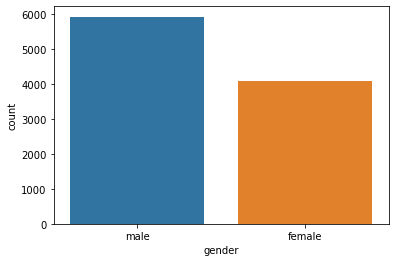

In [284]:
sns.countplot(Data['gender'])

#### There are almost equal number of male and female.

<AxesSubplot:xlabel='age', ylabel='count'>

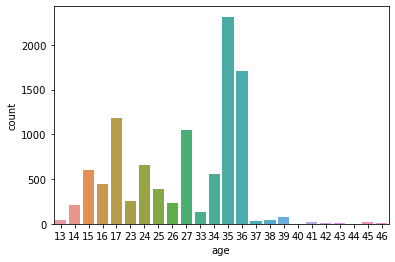

In [285]:
sns.countplot(Data['age'])

##### There are more number of people in the age group 16 to 27.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'InvestmentBanking'),
  Text(2, 0, 'indUnk'),
  Text(3, 0, 'Non-Profit'),
  Text(4, 0, 'Banking'),
  Text(5, 0, 'Education'),
  Text(6, 0, 'Engineering'),
  Text(7, 0, 'Science'),
  Text(8, 0, 'Communications-Media'),
  Text(9, 0, 'BusinessServices'),
  Text(10, 0, 'Sports-Recreation'),
  Text(11, 0, 'Arts'),
  Text(12, 0, 'Internet'),
  Text(13, 0, 'Museums-Libraries'),
  Text(14, 0, 'Accounting'),
  Text(15, 0, 'Technology'),
  Text(16, 0, 'Law'),
  Text(17, 0, 'Consulting'),
  Text(18, 0, 'Automotive'),
  Text(19, 0, 'Religion'),
  Text(20, 0, 'Fashion'),
  Text(21, 0, 'Publishing'),
  Text(22, 0, 'Marketing'),
  Text(23, 0, 'LawEnforcement-Security'),
  Text(24, 0, 'HumanResources'),
  Text(25, 0, 'Telecommunications')])

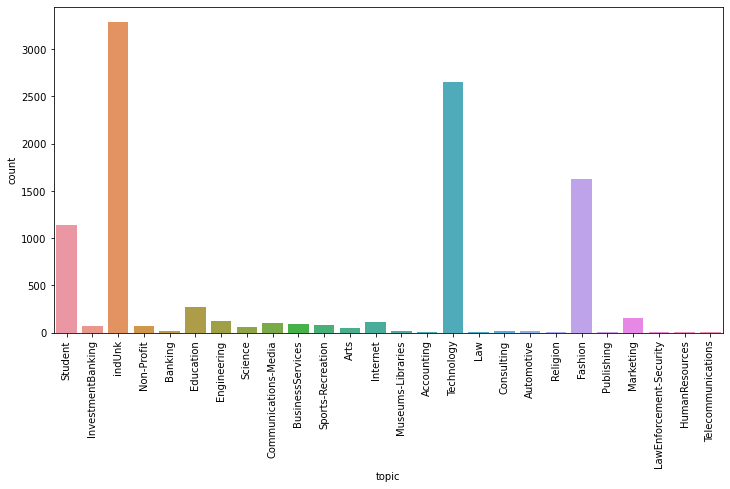

In [286]:
plt.figure(figsize=(12,6))
sns.countplot(Data['topic'])
plt.xticks(rotation=90)

#### More number in the topic of student IndUnk

<AxesSubplot:>

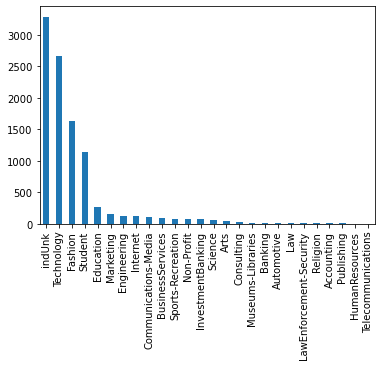

In [287]:
Data['topic'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='gender', ylabel='age'>

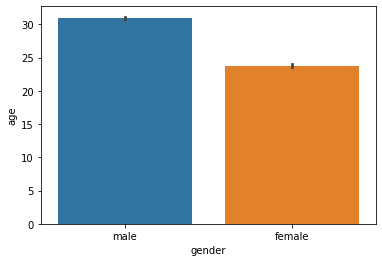

In [288]:
sns.barplot(x = 'gender',
            y = 'age',
            data = Data)

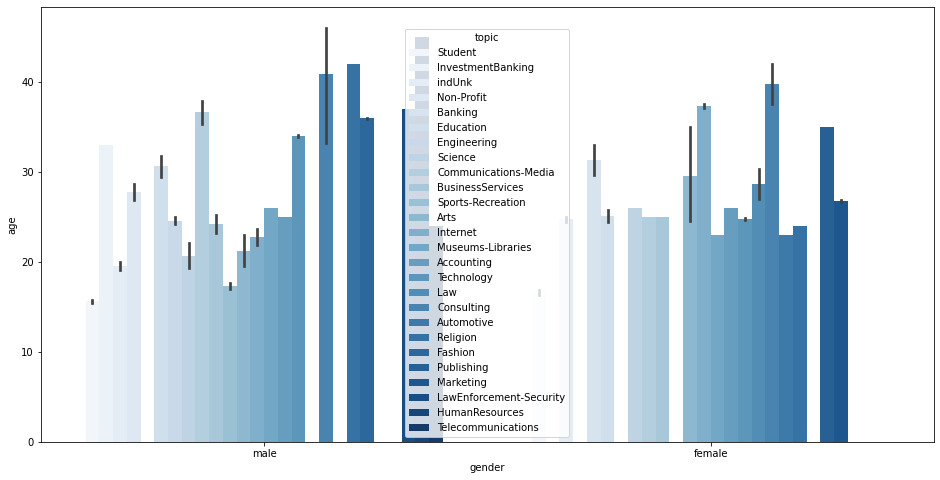

In [289]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'gender',
            y = 'age',
            hue = 'topic',
            data = Data,
            palette = "Blues")
plt.show()

###  Perform data pre-processing on the data:
    • Data cleansing by removing unwanted characters, spaces, stop words etc. 
    Convert text to lowercase.
    • Target/label merger and transformation
    • Train and test split
    • Vectorisation, etc.


In [290]:
Data.drop(labels=['id','date','sign'],axis=1,inplace=True)  #removing unwanted columns

In [291]:
#chosen few samples to speed up processing
Data = Data.sample(2000)

In [292]:
Data.shape

(2000, 4)

In [293]:
labels = Data.copy()
labels['age'] = labels['age'].astype(str)
labels['labels'] = labels[['gender','age','topic']].apply(lambda x:','.join(x), axis = 1) 


In [294]:
labels.drop(labels=['gender','text','age','topic'],axis=1,inplace=True)

In [295]:

labels.head()

,labels
4281,"female,34,indUnk"
7923,"female,38,Internet"
8518,"male,33,Non-Profit"
4097,"female,23,Student"
7367,"male,36,Fashion"


In [296]:
labels.reset_index()

,index,labels
0,4281,"female,34,indUnk"
1,7923,"female,38,Internet"
2,8518,"male,33,Non-Profit"
3,4097,"female,23,Student"
4,7367,"male,36,Fashion"
...,...,...
1995,1937,"male,35,Technology"
1996,4027,"male,14,Student"
1997,523,"female,27,Education"
1998,3673,"male,35,Technology"


In [297]:
new_data = Data.copy()
del Data
new_data = new_data['text']
new_data.head()
new_data.reset_index()

,index,text
0,4281,urlLink Battling with Sanity has cool...
1,7923,Jim Kendall has been visiting from Madr...
2,8518,urlLink Printer Friendly Version - Rev...
3,4097,Whew! While moving upstairs has ...
4,7367,This urlLink totally creeps me out...
...,...,...
1995,1937,urlLink http://www.angryflower.com...
1996,4027,I think I've figured out how to leave o...
1997,523,"Yesterday, the phone rang while I was b..."
1998,3673,Any of you seen this yet? urlLink...


In [298]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(new_data)):
    review = re.sub('[^a-zA-Z]', ' ',new_data.iloc[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [299]:
len(corpus)

2000

In [300]:
del new_data

In [301]:
X = corpus
joiny= lambda x: [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in x]]
print(labels['labels'].apply(joiny))
y = labels['labels']

4281    [[f], [e], [m], [a], [l], [e], [, ], [3], [4],...
7923    [[f], [e], [m], [a], [l], [e], [, ], [3], [8],...
8518    [[m], [a], [l], [e], [, ], [3], [3], [, ], [N]...
4097    [[f], [e], [m], [a], [l], [e], [, ], [2], [3],...
7367    [[m], [a], [l], [e], [, ], [3], [6], [, ], [F]...
                              ...                        
1937    [[m], [a], [l], [e], [, ], [3], [5], [, ], [T]...
4027    [[m], [a], [l], [e], [, ], [1], [4], [, ], [S]...
523     [[f], [e], [m], [a], [l], [e], [, ], [2], [7],...
3673    [[m], [a], [l], [e], [, ], [3], [5], [, ], [T]...
9227    [[f], [e], [m], [a], [l], [e], [, ], [2], [4],...
Name: labels, Length: 2000, dtype: object


In [302]:
print(y[:5])
print(labels['labels'].head())

4281      female,34,indUnk
7923    female,38,Internet
8518    male,33,Non-Profit
4097     female,23,Student
7367       male,36,Fashion
Name: labels, dtype: object
4281      female,34,indUnk
7923    female,38,Internet
8518    male,33,Non-Profit
4097     female,23,Student
7367       male,36,Fashion
Name: labels, dtype: object


In [303]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [304]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                      ngram_range=(1, 3), stop_words = 'english')


vectorizer.fit(corpus)

CountVectorizer(ngram_range=(1, 3), stop_words='english',
                token_pattern='\\w{1,}')

In [305]:
xtrain_ctv = vectorizer.fit_transform(X_train)

In [306]:
xtest_ctv = vectorizer.transform(X_test)

In [307]:
vectorizer.get_feature_names()[:10]

['aaa',
 'aaa come',
 'aaa come tow',
 'aaa someon',
 'aaa someon come',
 'aaa tow',
 'aaa tow car',
 'aaaaaaaaah',
 'aaaaaaah',
 'aaaaaaah fade']

In [308]:
#y = [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in y]]

In [309]:
vectorizer_labels = CountVectorizer(min_df = 1,ngram_range = (1,1),stop_words = "english")
labels_vector = vectorizer_labels.fit_transform(y)

In [310]:
labels_vector

<2000x53 sparse matrix of type '<class 'numpy.int64'>'
	with 6049 stored elements in Compressed Sparse Row format>

In [311]:
from sklearn.preprocessing import MultiLabelBinarizer
label_classes=[]
for  key in vectorizer_labels.vocabulary_.keys():
    label_classes.append(key)
print(label_classes)
binarizer = MultiLabelBinarizer(classes = label_classes)


['female', '34', 'indunk', '38', 'internet', 'male', '33', 'non', 'profit', '23', 'student', '36', 'fashion', '15', '27', 'technology', '24', '16', '35', '14', '41', 'education', '17', '39', 'engineering', '26', '25', 'investmentbanking', 'marketing', 'businessservices', 'science', 'communications', 'media', 'arts', '43', 'sports', 'recreation', '42', 'consulting', '45', 'humanresources', 'religion', 'museums', 'libraries', '13', 'law', '44', 'automotive', '37', 'publishing', '46', 'lawenforcement', 'security']


In [312]:
print(len(label_classes))

53


In [313]:

#labels_trans = binarizer.fit(labels) 
Y_train = [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in y_train]]

Y_test = [["".join(re.findall("\w",f)) for f in lst] for lst in [str(s).split(",") for s in y_test]]


In [314]:
Y_train_bin = binarizer.fit_transform(Y_train)

Y_test_bin = binarizer.transform(Y_test) 

In [315]:
Y_train_bin.shape

(1400, 53)

In [316]:
Y_train_bin[:5]

array([[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [317]:
binarizer.inverse_transform(Y_train_bin)[:5]

[('female', '34'),
 ('male', '36'),
 ('male', '35'),
 ('female', '34'),
 ('male', '16')]

In [318]:
Y_test_bin.shape

(600, 53)

In [319]:
Y_train_bin.shape

(1400, 53)

In [320]:
print(xtest_ctv.shape[0])

600


In [321]:
print(xtrain_ctv.shape[0])

1400


In [322]:
Y_test_bin[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [323]:

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1]
grid = dict(estimator__solver=solvers,estimator__penalty=penalty,estimator__C=c_values)
cv = KFold(n_splits=5,shuffle=True, random_state=1)

# summarize results
lr_clf = LogisticRegression() 
lr_clf = OneVsRestClassifier(lr_clf)
#print(lr_clf.get_params().keys())
#lr_clf.fit(xtrain_ctv,Y_train_bin)
grid_search = GridSearchCV(estimator=lr_clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xtrain_ctv,Y_train_bin)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.176429 using {'estimator__C': 1.0, 'estimator__penalty': 'l2', 'estimator__solver': 'newton-cg'}
0.148571 (0.036742) with: {'estimator__C': 10, 'estimator__penalty': 'l2', 'estimator__solver': 'newton-cg'}
0.148571 (0.036742) with: {'estimator__C': 10, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}
0.147857 (0.037430) with: {'estimator__C': 10, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}
0.176429 (0.024599) with: {'estimator__C': 1.0, 'estimator__penalty': 'l2', 'estimator__solver': 'newton-cg'}
0.176429 (0.024599) with: {'estimator__C': 1.0, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}
0.170714 (0.027793) with: {'estimator__C': 1.0, 'estimator__penalty': 'l2', 'estimator__solver': 'liblinear'}
0.130000 (0.014569) with: {'estimator__C': 0.1, 'estimator__penalty': 'l2', 'estimator__solver': 'newton-cg'}
0.130000 (0.014569) with: {'estimator__C': 0.1, 'estimator__penalty': 'l2', 'estimator__solver': 'lbfgs'}
0.125000 (0.019821) with: {'es

In [324]:

print("Training Accuracy logistic regression :",grid_search.score(xtrain_ctv,Y_train_bin))

Training Accuracy logistic regression : 0.9635714285714285


In [325]:
y_pred = grid_search.predict(xtest_ctv)
print("Test Accuracy Logistic regression :" + str(accuracy_score(Y_test_bin,y_pred)))

Test Accuracy Logistic regression :0.16


In [326]:
print("True labels and predicted labels")
print(binarizer.inverse_transform(Y_test_bin)[:5])
binarizer.inverse_transform(y_pred)[0:5]

True labels and predicted labels
[('female', '16'), ('female', '27'), ('male', '15'), ('male', '35'), ('male', '35')]


[('male',), ('male',), ('male',), ('male', '35'), ('male',)]

In [327]:

print('Test Accuracy score: ', accuracy_score(Y_test_bin, y_pred))
print('F1 score: Micro', f1_score(Y_test_bin, y_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, y_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, y_pred,average='micro'))
print(classification_report(Y_test_bin, y_pred))

Test Accuracy score:  0.16
F1 score: Micro 0.5290190035952748
Average precision score: Micro 0.3174188367726672
Average recall score: Micro 0.42916666666666664
              precision    recall  f1-score   support

           0       0.70      0.46      0.56       253
           1       0.86      0.22      0.35        27
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.69      0.85      0.76       347
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         0
          11       0.78      0.26      0.39        97
          12       0.00      0.00      0.00         0
          13       0.50      0.03      0.05        40
          14       0.58      

Classification report shows precision, recall, F1-score are higher for those labels which have more counts in the training set (support).

In [328]:
import random 

def print_predicted(y_predicted, y_test , n = 5):
    j = []
    for i in range(n):
        j.append(random.randint(0, len(y_test)))
    print(j)
                 
    for k in j:
        print(binarizer.inverse_transform(y_predicted)[k])
        print(binarizer.inverse_transform(y_test)[k])

In [329]:
print_predicted(y_predicted=y_pred,y_test=Y_test_bin, n= 5)

[422, 572, 47, 410, 188]
('female',)
('female', '36')
('male',)
('female', '25')
('female',)
('male', '33')
('female',)
('female', '17')
('female',)
('male', '16')


In [330]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=10,random_state=0)

In [331]:
model.fit(xtrain_ctv,Y_train_bin)
rf_pred = model.predict(xtest_ctv)

In [332]:
binarizer.inverse_transform(rf_pred)[0:5]

[('male',), ('male',), ('male',), ('male',), ('male',)]

In [333]:
Y_test_bin[0:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [334]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bin,rf_pred)))
print('F1 score: Micro', f1_score(Y_test_bin, rf_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, rf_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, rf_pred,average='micro'))

Test Accuracy:0.0
F1 score: Micro 0.39555555555555555
Average precision score: Micro 0.2025631027253669
Average recall score: Micro 0.2966666666666667


In [335]:
#!pip install scikit-multilearn

In [336]:
vectorizer_labels_tfd = TfidfVectorizer(min_df = 3,ngram_range = (1,1),stop_words = "english")
labels_vector_tfd = vectorizer_labels.fit_transform(y)

In [337]:
binarizer_tfd = MultiLabelBinarizer(classes = label_classes)


In [338]:
Y_train_bintfd = binarizer_tfd.fit_transform(Y_train)

Y_test_bintfd = binarizer_tfd.transform(Y_test) 

In [339]:
tfv = TfidfVectorizer(min_df=3,  max_features=None,strip_accents='unicode', \
                      analyzer='word',token_pattern=r'\w{1,}',\
                      ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,\
                      stop_words = 'english')


# # Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(X_train) + list(X_test))
xtrain_tfv =  tfv.transform(X_train) 
xtest_tfv = tfv.transform(X_test)
xtrain_tfv

<1400x8158 sparse matrix of type '<class 'numpy.float64'>'
	with 74859 stored elements in Compressed Sparse Row format>

In [340]:
from sklearn.linear_model import PassiveAggressiveClassifier

linear_clf_tfv = PassiveAggressiveClassifier(max_iter=50)
linear_clf_tfv = OneVsRestClassifier(linear_clf_tfv)

In [341]:
print(xtrain_tfv.shape[0],Y_train_bintfd.shape[0])

1400 1400


In [342]:
linear_clf_tfv.fit(xtrain_tfv, Y_train_bintfd)
linear_clf_pred = linear_clf_tfv.predict(xtest_tfv)
score = metrics.accuracy_score(Y_test_bintfd, linear_clf_pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.247


In [343]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,linear_clf_pred)))
print('F1 score: Micro', f1_score(Y_test_bintfd, linear_clf_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bintfd, linear_clf_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bintfd, linear_clf_pred,average='micro'))

Test Accuracy:0.24666666666666667
F1 score: Micro 0.5925206410879067
Average precision score: Micro 0.37953522085795244
Average recall score: Micro 0.5083333333333333


In [344]:
lr_clf_tfv = LogisticRegression(solver = 'sag',max_iter = 1000,multi_class='auto') 
lr_clf_tfv = OneVsRestClassifier(lr_clf_tfv)
lr_clf_tfv.fit(xtrain_tfv,Y_train_bin)
lr_clf_tfv_pred=lr_clf_tfv.predict(xtest_tfv)

In [345]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,lr_clf_tfv_pred)))
print('F1 score: Micro', f1_score(Y_test_bintfd, lr_clf_tfv_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bintfd, lr_clf_tfv_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bintfd, lr_clf_tfv_pred,average='micro'))

Test Accuracy:0.03333333333333333
F1 score: Micro 0.49533223503569473
Average precision score: Micro 0.2965016609445103
Average recall score: Micro 0.37583333333333335


In [346]:
print(binarizer.inverse_transform(lr_clf_tfv_pred)[0:5])

[('male',), ('male',), ('male',), ('male',), ('male',)]


In [347]:
print(binarizer.inverse_transform(Y_test_bintfd)[:5])

[('female', '16'), ('female', '27'), ('male', '15'), ('male', '35'), ('male', '35')]


In [348]:


mnb_clf = MultinomialNB()
mnb_clf = OneVsRestClassifier(mnb_clf)
mnb_clf.fit(xtrain_tfv, Y_train_bin)
mnb_ypred = mnb_clf.predict(xtest_tfv)


In [349]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bin,mnb_ypred)))
print('F1 score: Micro', f1_score(Y_test_bin, mnb_ypred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, mnb_ypred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, mnb_ypred,average='micro'))

Test Accuracy:0.008333333333333333
F1 score: Micro 0.4620498614958448
Average precision score: Micro 0.26413917043505375
Average recall score: Micro 0.3475


In [350]:

svc_clf = LinearSVC()
svc_clf = OneVsRestClassifier(svc_clf)
svc_clf.fit(xtrain_tfv, Y_train_bin)
svc_pred = svc_clf.predict(xtest_tfv)

In [351]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,svc_pred)))
print('F1 score: Micro', f1_score(Y_test_bintfd, svc_pred,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, svc_pred, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, svc_pred,average='micro'))

Test Accuracy:0.19166666666666668
F1 score: Micro 0.5748071979434447
Average precision score: Micro 0.36968855261491707
Average recall score: Micro 0.4658333333333333


In [352]:
svc_clf_ctv = LinearSVC()
svc_clf_ctv = OneVsRestClassifier(svc_clf_ctv)
svc_clf_ctv.fit(xtrain_ctv, Y_train_bin)
svc_pred_ctv = svc_clf_ctv.predict(xtest_ctv)


In [353]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,svc_pred_ctv)))
print('F1 score: Micro', f1_score(Y_test_bintfd, svc_pred_ctv,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, svc_pred_ctv, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, svc_pred_ctv,average='micro'))

Test Accuracy:0.16166666666666665
F1 score: Micro 0.49713193116634796
Average precision score: Micro 0.2739994923428378
Average recall score: Micro 0.43333333333333335


Implemented different multilabel classifiers: 
   
    Trained and tested Logistic regression,SVC, random forest classifier, GaussianNB with Binaryrelevance, GaussianNB with labelpowerset along with features transformed using countvectorizer.
    And PassiveAggressiveClassifier and Logiscticregression are implemented with tfid vectorizer.
    SVC and PassiveAggressiveClassifier along with tfidvectorizer shows better test accuracy than other classifiers.
    Testing accuracy of Logistic regression is less than to that of SVC with tfidvectorizer also.
    TFidvectorizer provides better results as it also provides importance of the words.
    
    With Logistic regression, MultinomialNB, SVC and PassiveAggressiveClassifier tfidvectorizer is used.
    
    Also hyperparameter tuning is done on Logistic regression, SVC and multinomialNB.
    From classification report we can see that precision,recall,f1-score is higher for the labels which contains larger counts(support values).

In [354]:

params = {'estimator__alpha': [1, 0.1, 0.01, 0.001],}  # creating parameter grid
 
# Optimal C by grid search 
NB_clf = OneVsRestClassifier(estimator=MultinomialNB())
print(NB_clf.get_params().keys())
Multinomial_NB = GridSearchCV(NB_clf, params, scoring = 'f1_micro', cv=5)
 
#fit and print best estimator  & CV Score
Multinomial_NB.fit(xtrain_tfv, Y_train_bin)
print(Multinomial_NB.best_estimator_)
print("Best Cross Validation Score: ",Multinomial_NB.best_score_)
 
#fit tuned clf on test set and gather accuracy and hamming loss
mn_predictions = Multinomial_NB.predict(xtest_tfv)
print("\n Accuracy :",metrics.accuracy_score(Y_test_bin, mn_predictions))

 
#micro- precision, recall, f1
precision=precision_score(Y_test_bin, mn_predictions, average='micro')
recall=recall_score(Y_test_bin, mn_predictions, average='micro')
f1=f1_score(Y_test_bin, mn_predictions, average='micro')
 
#print precision, recall, f1 scores 
print("\n Micro-average")
print("Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}".format(precision, recall, f1))
print(Multinomial_NB.best_params_)

dict_keys(['estimator__alpha', 'estimator__class_prior', 'estimator__fit_prior', 'estimator', 'n_jobs'])
OneVsRestClassifier(estimator=MultinomialNB(alpha=0.1))
Best Cross Validation Score:  0.5518887903672314

 Accuracy : 0.17333333333333334

 Micro-average
Precision: 0.7605, Recall: 0.4658, F1: 0.5778
{'estimator__alpha': 0.1}


In [355]:
print(classification_report(Y_test_bin, mn_predictions))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       253
           1       1.00      0.04      0.07        27
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0
           5       0.76      0.83      0.79       347
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         0
          11       0.92      0.37      0.53        97
          12       0.00      0.00      0.00         0
          13       0.50      0.05      0.09        40
          14       0.92      0.17      0.29        65
          15       0.00      0.00      0.00         0
          16       1.00      0.06      0.12        47
          17       0.60    

In [356]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model = OneVsRestClassifier(svc_model)
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(estimator__kernel=kernel,estimator__C=C,estimator__gamma=gamma)
cv = KFold(n_splits=5,shuffle=True, random_state=1)
#print(svc_model.get_params().keys())
grid_search = GridSearchCV(estimator=svc_model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(xtrain_tfv, Y_train_bin)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
predicted_g = grid_search.predict(xtest_tfv)

Best: 0.272143 using {'estimator__C': 10, 'estimator__gamma': 'scale', 'estimator__kernel': 'sigmoid'}
0.008571 (0.005345) with: {'estimator__C': 50, 'estimator__gamma': 'scale', 'estimator__kernel': 'poly'}
0.079286 (0.032608) with: {'estimator__C': 50, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}
0.232143 (0.012778) with: {'estimator__C': 50, 'estimator__gamma': 'scale', 'estimator__kernel': 'sigmoid'}
0.009286 (0.005345) with: {'estimator__C': 10, 'estimator__gamma': 'scale', 'estimator__kernel': 'poly'}
0.079286 (0.032608) with: {'estimator__C': 10, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}
0.272143 (0.037958) with: {'estimator__C': 10, 'estimator__gamma': 'scale', 'estimator__kernel': 'sigmoid'}
0.006429 (0.005249) with: {'estimator__C': 1.0, 'estimator__gamma': 'scale', 'estimator__kernel': 'poly'}
0.021429 (0.009035) with: {'estimator__C': 1.0, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}
0.158571 (0.038306) with: {'estimator__C': 1.0, 'est

In [357]:
print("Test Accuracy:" + str(accuracy_score(Y_test_bintfd,predicted_g)))
print('F1 score: Micro', f1_score(Y_test_bintfd, predicted_g,average='micro'))
print('Average precision score: Micro', average_precision_score(Y_test_bin, predicted_g, average='micro'))
print('Average recall score: Micro', recall_score(Y_test_bin, predicted_g,average='micro'))

Test Accuracy:0.27666666666666667
F1 score: Micro 0.5942228335625861
Average precision score: Micro 0.3740557382724598
Average recall score: Micro 0.54


In [358]:
print(classification_report(Y_test_bin, predicted_g))

              precision    recall  f1-score   support

           0       0.70      0.61      0.65       253
           1       1.00      0.48      0.65        27
           2       0.00      0.00      0.00         0
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         0
           5       0.74      0.81      0.77       347
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00         0
          11       0.59      0.45      0.51        97
          12       0.00      0.00      0.00         0
          13       0.38      0.12      0.19        40
          14       0.59      0.35      0.44        65
          15       0.00      0.00      0.00         0
          16       0.40      0.21      0.28        47
          17       0.77    